# [Week7] 이미지 분석 활용 맛보기

* 과제
    * 문제 1번을 풀어주세요.
    * `2~3번`의 각 실행 코드를 실행해보며, 자신이 이해하기 편하도록 코드를 분석하여 `주석`을 달아주세요.
    * `4번`의 맨 마지막 실습은 `직접 코드를 작성`해주세요.

## 1. 라이브러리 설치

### (1) cvlib : 객체인식, 얼굴인식, 성별인식

* 참고 링크 : [cvlib docs](https://docs.cvlib.net/)
* 혹시 아래 라이브러리를 설치하다가 버전 문제가 생길 때(특히 tensorflow), 해결하기 가장 쉬운 방법은 다음과 같습니다.
    * 주피터 노트북에서 새로운 가상환경을 만들기
    * 모든 라이브러리를 최신 버전으로 다시 다운 받기 (numpy 버전과 tensorflow 버전을 호환되게 맞추기)

In [1]:
# CVlib
!pip install cvlib

  Created wheel for cvlib: filename=cvlib-0.2.5-py3-none-any.whl size=10044212 sha256=84b39cdd48008ac7801db2dac8929986a124ff44de8ebaac4e0c4c77e14c05eb
  Stored in directory: c:\users\usersilsoo\appdata\local\pip\cache\wheels\a8\8b\78\d0ae9aa22f0efb2ac44feb35ce4cf09bdae5adb37b9723fa76
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12078 sha256=58dbee341175986967413c6f885b44b5c15b585dc7715702c78b45ae46ce547f
  Stored in directory: c:\users\usersilsoo\appdata\local\pip\cache\wheels\2c\67\ed\d84123843c937d7e7f5ba88a270d11036473144143355e2747
  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25855 sha256=772aa7d6dd8c0ac36f1b9feb9eb81a2b725f2e560f584c6bcb20ed6f5b1d6572
  Stored in directory: c:\users\usersilsoo\appdata\local\pip\cache\wheels\c8\d6\0f\b0c3892b70c59f0d202f8619a449f7d14cb839a0af2f943869
Successfully built cvlib progressbar imutils


In [2]:
# tensorflow
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=b1e04d83f384e08eef550f779a7bc069f8d188fbbba5982a7abb0dce4366a4c1
  Stored in directory: c:\users\usersilsoo\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=c0fbf8954cb6ba03a8e3f7632879286f5333cf2624cd9cb1ee1487db5f4edd24
  Stored in directory: c:\users\usersilsoo\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1


In [1]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import numpy as np

> __문제 1번 : cvlib 이용 시 매개변수로 넣는 이미지의 기본 컬러공간(color space)은 무엇이어야 할까요?__

* 답변 : BGR order

## 2. 라이브러리 사용 실습

* 참고 링크 : https://github.com/arunponnusamy/cvlib

### 2-1. 객체인식(Object Detection)

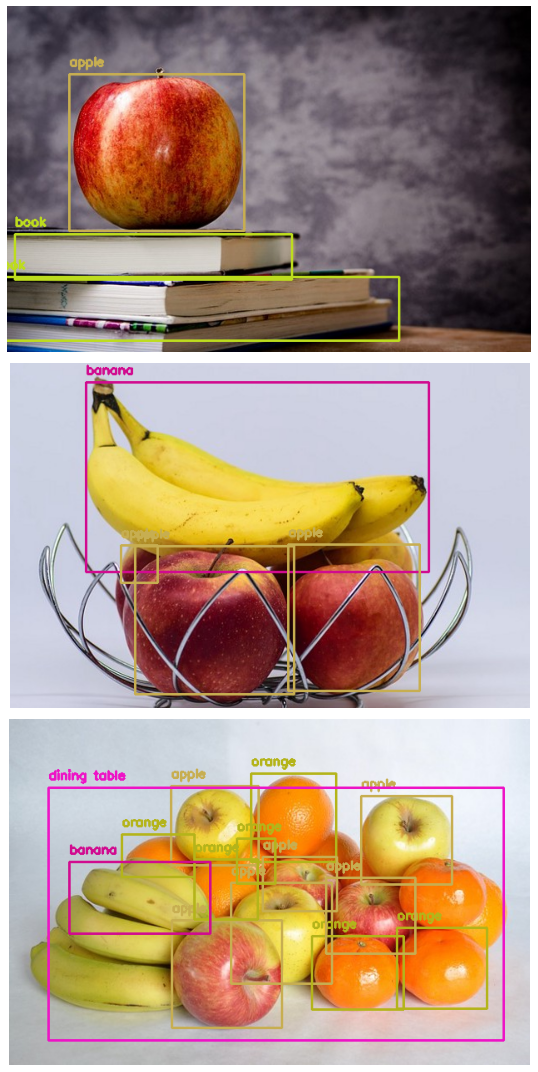

In [4]:
fig = plt.figure(figsize=(15,15))
for i in range(1, 4):
# load image
    image_path = './image/image'+ str(i) +'.jpeg'
    im = cv2.imread(image_path)
    
# detect_common_objects(image, confidence=0.5, nms_thresh=0.3, model='yolov3', enable_gpu=False)
# model; yolov3 or yolov3-tiny
# bounding box co-ordinates, corrensponding labels and confidence scores
    bbox, label, conf = cv.detect_common_objects(im)

# draw_bbox(img, bbox, labels, confidence, colors=None, write_conf=False)
# cv2.rectangle() and cv2.putText()
    output_image = draw_bbox(im, bbox, label, conf)
# cv2, cvlib use BGR. Convert BGR to RGB. 
    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(3, 1, i)
    plt.imshow(output_image)
    plt.axis('off')
plt.tight_layout()
plt.show()

### 2-2. 얼굴인식(Face Detection)

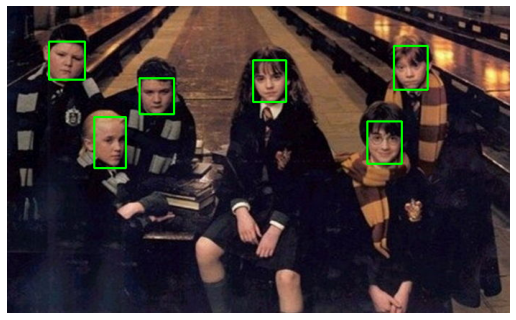

In [7]:
fig = plt.figure(figsize=(9,9))
image_path = './image/harrypotter.jpg'
im = cv2.imread(image_path)

# detect_face(image, threshold=0.5, enable_gpu=False)
# bounding box corners and corresponding confidence
faces, confidences = cv.detect_face(im)

# face is an array means 4 points of rectangle.
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.show()

### 2-3. 성별인식(Gender Detection)

45654016/45649168 [==============================] - 14s 0us/step
[INFO] Initializing gender detection model ..


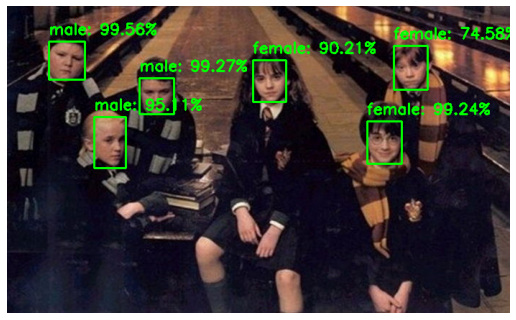

In [8]:
fig = plt.figure(figsize=(9,9))
image_path = './image/harrypotter.jpg'
im = cv2.imread(image_path)

faces, confidences = cv.detect_face(im)
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    
# get face image
    face_crop = np.copy(im[startY:endY, startX:endX])
    
# detect_gender(face, enable_gpu=False)
# the labels (man, woman) and associated probabilities.
    (label, confidence) = cv.detect_gender(face_crop)

    idx = np.argmax(confidence)
    label = label[idx]
    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10
    
# draw_bbox
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)
    cv2.putText(im, label, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0,255,0), 2)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.show()

## 3. 웹캠 입출력

In [2]:
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
# Capture frame-by-frame
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()
        
    frame = cv2.flip(frame, 1)
    
# Display the resulting frame
# if camera app is activated, error occured. 
    cv2.imshow("Real-time video", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
webcam.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

## 4. 나만의 프로그램 만들기 (직접 코드 작성)

* 실습 내용 : `웹캠 입출력`과 `객체인식 or 얼굴인식+성별인식` 코드를 합친 코드를 작성하세요.
    * 후보1 : 웹캠 입출력 + 객체인식 프로그램
    * 후보2 : 웹캠 입출력 + 얼굴인식+성별인식 프로그램

* 나의 선택 : 후보 ( 1 ) 번

In [3]:
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()
        
    frame = cv2.flip(frame, 1)
    
# Object detection
    bbox, label, conf = cv.detect_common_objects(frame)
    output_frame = draw_bbox(frame, bbox, label, conf)
    
    cv2.imshow("Real-time video", output_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
webcam.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

* 나의 선택 : 후보 ( 2 ) 번

In [5]:
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()
        
    frame = cv2.flip(frame, 1)
    
# Face detection
    faces, confidences = cv.detect_face(frame)
    for face in faces:
        (startX,startY) = face[0],face[1]
        (endX,endY) = face[2],face[3]
        face_crop = np.copy(frame[startY:endY, startX:endX])
        
# Gender detection
        (label, confidence) = cv.detect_gender(face_crop)
        idx = np.argmax(confidence)
        label = label[idx]
        label = "{}: {:.2f}%".format(label, confidence[idx] * 100)
        Y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)
        cv2.putText(frame, label, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0,255,0), 2)
    
    cv2.imshow("Real-time video", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
webcam.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 